In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:/JN/StudentsPerformance.csv")

In [3]:
data.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
print(data.columns.tolist())
data.shape

['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']


(1000, 8)

In [5]:
print("Dataset Type:")
print(data.dtypes)
print("\nSummary Statistics:")
print(data.describe())
print("\nMissing Values:")
print(data.isnull().sum())

Dataset Type:
gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

Summary Statistics:
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000

Missing Values:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0


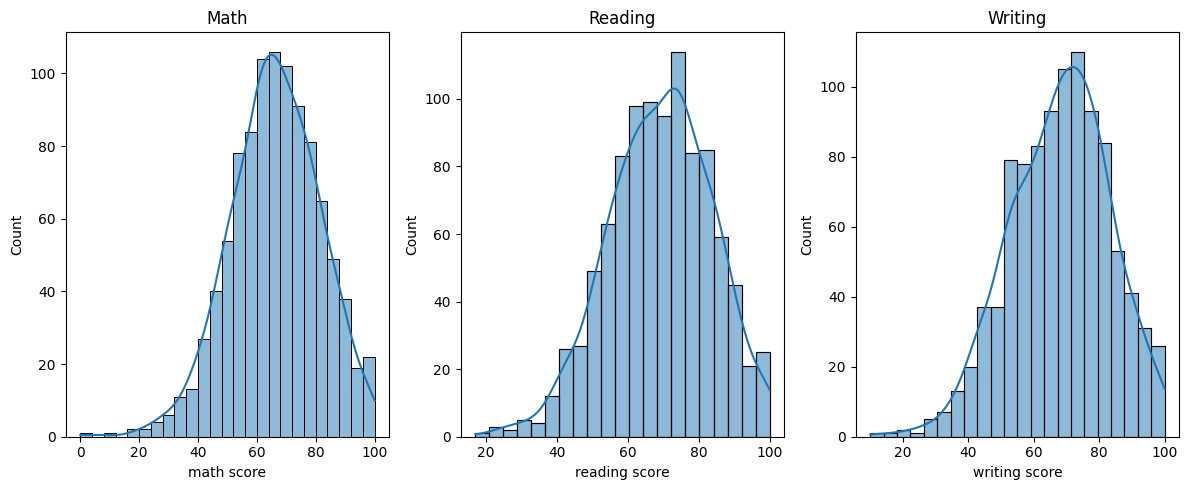

In [6]:
fig, ax = plt.subplots(1,3, figsize=(12, 5))
sns.histplot(data['math score'], kde=True, ax=ax[0])
ax[0].set_title('Math')
sns.histplot(data['reading score'], kde=True, ax=ax[1])
ax[1].set_title('Reading')
sns.histplot(data['writing score'], kde=True, ax=ax[2])
ax[2].set_title('Writing')
plt.tight_layout()
plt.show()

In [7]:
data['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [8]:
data.groupby('race/ethnicity')['race/ethnicity'].count()

race/ethnicity
group A     89
group B    190
group C    319
group D    262
group E    140
Name: race/ethnicity, dtype: int64

<Axes: xlabel='count', ylabel='race/ethnicity'>

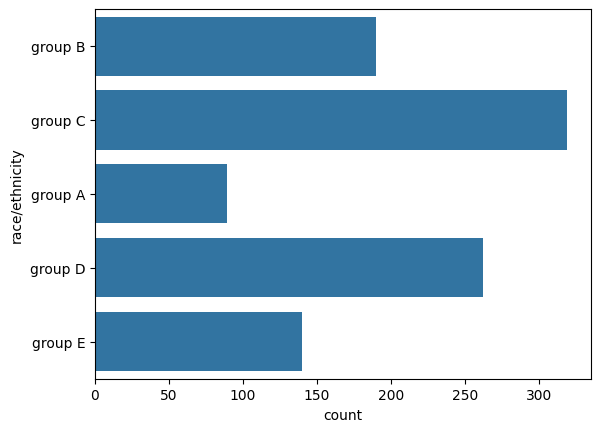

In [9]:
sns.countplot(data['race/ethnicity'])

In [10]:
data['parental level of education'].nunique()

6

In [11]:
data['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

# Adding Total Score column

In [12]:
data['Total_Score'] = data['math score'] + data['reading score'] + data['writing score']

# Adding Average Score column

In [13]:
data['Average_Score'] = data['Total_Score'] / 3

In [14]:
data.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_Score,Average_Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


## EDA

#### Female, Bachelor's Degree and Completed Test Course

In [15]:
data[(data['gender'] == 'female') & (data['parental level of education'] == 'bachelor\'s degree') & (data['test preparation course'] == 'completed')]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_Score,Average_Score
114,female,group E,bachelor's degree,standard,completed,99,100,100,299,99.666667
120,female,group C,bachelor's degree,standard,completed,79,92,89,260,86.666667
148,female,group D,bachelor's degree,standard,completed,68,75,81,224,74.666667
165,female,group C,bachelor's degree,standard,completed,96,100,100,296,98.666667
174,female,group C,bachelor's degree,free/reduced,completed,43,51,54,148,49.333333
314,female,group C,bachelor's degree,standard,completed,59,64,75,198,66.000000
347,female,group C,bachelor's degree,standard,completed,77,94,95,266,88.666667
414,female,group C,bachelor's degree,free/reduced,completed,51,72,79,202,67.333333
475,female,group D,bachelor's degree,standard,completed,71,76,83,230,76.666667
535,female,group C,bachelor's degree,free/reduced,completed,66,83,83,232,77.333333


#### Male, Bachelor's Degree and Completed Test Course

In [16]:
data[(data['gender'] == 'male') & (data['parental level of education'] == 'bachelor\'s degree') & (data['test preparation course'] == 'completed')]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_Score,Average_Score
24,male,group D,bachelor's degree,free/reduced,completed,74,71,80,225,75.000000
60,male,group E,bachelor's degree,free/reduced,completed,79,74,72,225,75.000000
77,male,group A,bachelor's degree,standard,completed,80,78,81,239,79.666667
101,male,group D,bachelor's degree,standard,completed,68,74,74,216,72.000000
134,male,group D,bachelor's degree,free/reduced,completed,74,79,75,228,76.000000
234,male,group C,bachelor's degree,standard,completed,83,82,84,249,83.000000
312,male,group D,bachelor's degree,standard,completed,67,61,68,196,65.333333
365,male,group A,bachelor's degree,free/reduced,completed,49,58,60,167,55.666667
416,male,group C,bachelor's degree,standard,completed,71,74,68,213,71.000000
464,male,group A,bachelor's degree,standard,completed,75,58,62,195,65.000000


### Comparing Data Male and Female

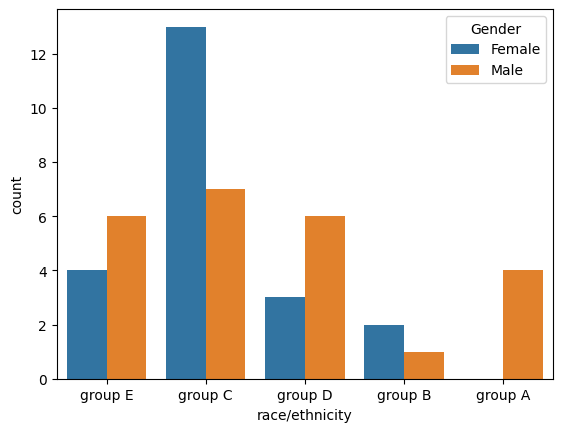

In [17]:
# Filter data for females with a bachelor's degree and completed test preparation course
female_bachelor_data = data[(data['gender'] == 'female') & 
                            (data['parental level of education'] == "bachelor's degree") & 
                            (data['test preparation course'] == 'completed')]

# Filter data for males with a bachelor's degree and completed test preparation course
male_bachelor_data = data[(data['gender'] == 'male') & 
                          (data['parental level of education'] == "bachelor's degree") & 
                          (data['test preparation course'] == 'completed')]

# Combine both filtered datasets (female and male) for comparison
combined_data = pd.concat([female_bachelor_data.assign(Gender='Female'), 
                           male_bachelor_data.assign(Gender='Male')])

# Create the count plot with hue to differentiate between Male and Female
sns.countplot(x='race/ethnicity', data=combined_data, hue='Gender')

# Show the plot
plt.show()


### Pie Chart Highest Average between Male and Female

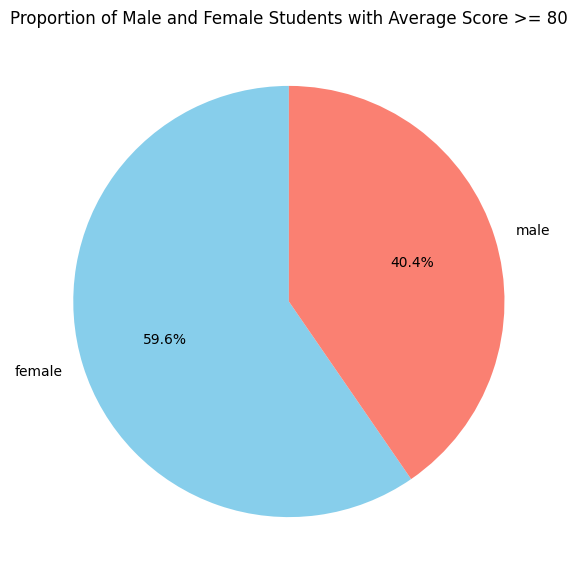

In [18]:
# Filter the data for individuals with an Average_Score >= 80
high_score_data = data[data['Average_Score'] >= 80]

# Count the number of males and females in the filtered data
gender_counts = high_score_data['gender'].value_counts()

# Create a pie chart
plt.figure(figsize=(7, 7))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Proportion of Male and Female Students with Average Score >= 80')

# Show the plot
plt.show()

 #### Predicting Average Score based on Individual Test Scores (Regression)

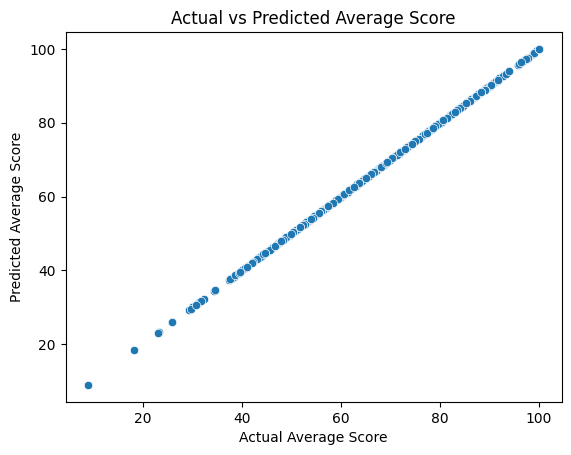

In [19]:
from sklearn.linear_model import LinearRegression

# Features: Math, Reading, and Writing scores
X = data[['math score', 'reading score', 'writing score']]

# Target: Average Score
y = data['Average_Score']

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Make predictions
predictions = model.predict(X)

# Visualize the predictions vs actual
sns.scatterplot(x=y, y=predictions)
plt.xlabel('Actual Average Score')
plt.ylabel('Predicted Average Score')
plt.title('Actual vs Predicted Average Score')
plt.show()

#### Predicting Whether a Student Completes the Test Preparation Course (Classification)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Encoding the categorical 'parental level of education' column
label_encoder = LabelEncoder()
data['parental level of education'] = label_encoder.fit_transform(data['parental level of education'])

# Fitur: Math, Reading, dan Writing scores
X = data[['math score', 'reading score', 'writing score']]

# Target: Parental Level of Education
y = data['parental level of education']

# Memisahkan data menjadi training dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Membuat dan melatih model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Membuat prediksi
predictions = model.predict(X_test)

# Mengevaluasi model
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.31      0.29      0.30        68
           1       0.16      0.20      0.18        30
           2       0.25      0.25      0.25        57
           3       0.14      0.15      0.14        20
           4       0.29      0.28      0.29        67
           5       0.18      0.17      0.17        58

    accuracy                           0.24       300
   macro avg       0.22      0.22      0.22       300
weighted avg       0.24      0.24      0.24       300

